## Frisch-Waugh-Lovell
- 순수하게 하나의 변수의 영향력을 보기위해 나머지 변수들로 target 값과 x1을 회귀분석실시하여 나온 잔차 *x2와 *y를 회귀분석한다.
- 다른 독립변수의 영향을 모두 제거한 후 남은 데이터만으로 회귀분석을 한 결과는 모든 독립변수를 같이 사용하여 회귀분석한 결과와 같다.

### Partial regression
- 유일한 독립변수 x1의 가중치는 x2가 추가되었을 때 x1의 가중치와 다르다.
- 독립변수의 갯수가 많은 경우 특정한 하나의 독립변수의 영향력을 시각화 한다.
    - 1. x1을 제외한 나머지 독립변수로 종속변수를 선형회귀하여 y잔차를 구한다.
    - 2. 나머지 독립변수들로 특정한 독립변수 선형회귀하여 잔차 z를 구한다.
    - 3. 잔차 z를 독립변수로 종속변수인 y의 회귀분석/////

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [8]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [12]:
df = pd.concat([dfX,dfy], axis=1)

In [14]:
model_boston = sm.OLS(dfy, dfX0)
result_boston = model_boston.fit()

##### plot_regress_exog : 
- 하나의 변수에 대해 명령을 실행하면  partial regression plot을 포함한 분석결과를 보여준다.

<function matplotlib.pyplot.show>

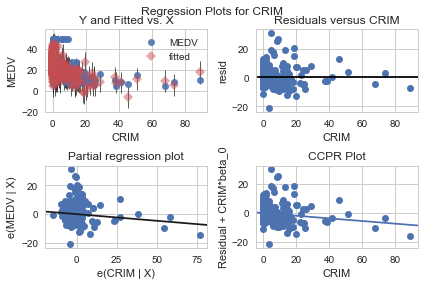

In [26]:
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
plt.show

##### partial regression plot만 그리려면.... 
- ret_coords=True : 잔차 데이터반환

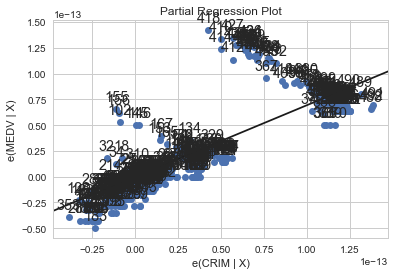

In [36]:
p,resids = sm.graphics.plot_partregress("MEDV","CRIM",list(set(df.columns)) ,data=df, \
                             ret_coords=True)
plt.show()

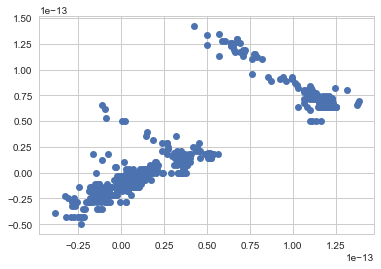

In [38]:
plt.plot(resids[0], resids[1], 'o')
plt.show()

##### sm.graphics.plot_partregress_grid
- 전체 데이터 한번에 partial regression plot으로~

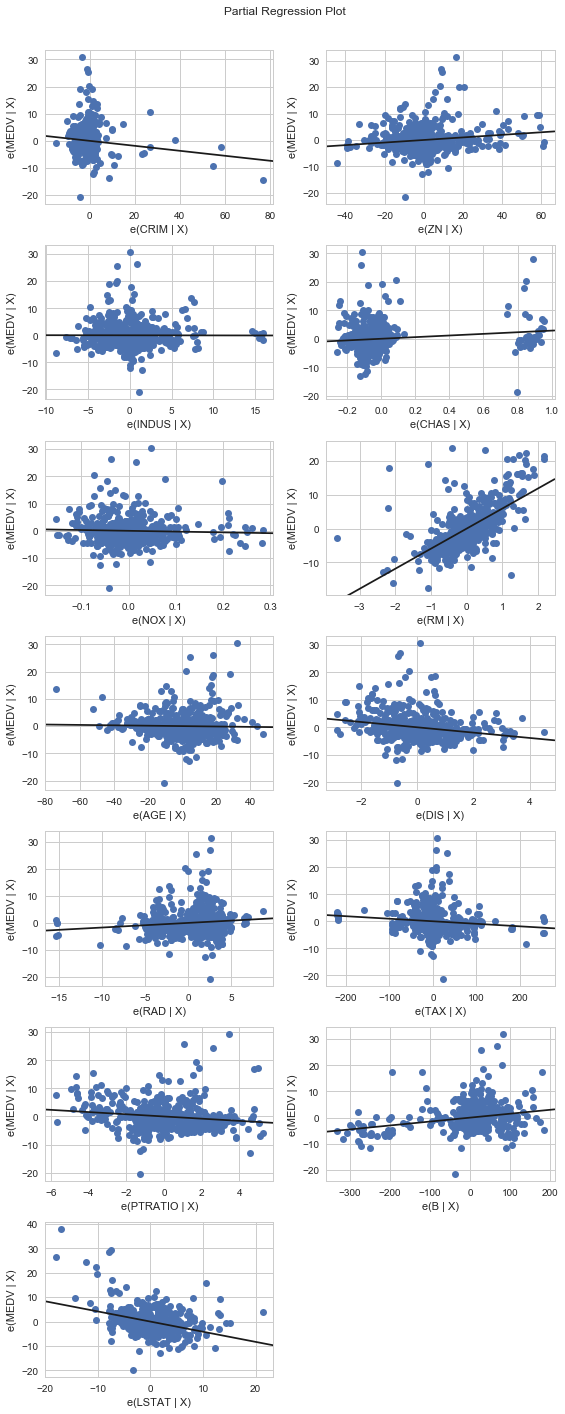

In [39]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result_boston, fig=fig)
plt.show()

##### CCPR plot

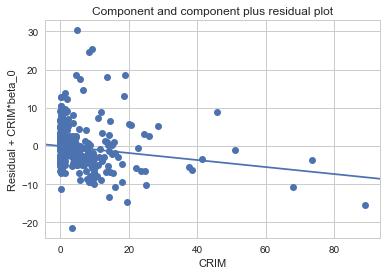

In [40]:
sm.graphics.plot_ccpr(result_boston, "CRIM")
plt.show()

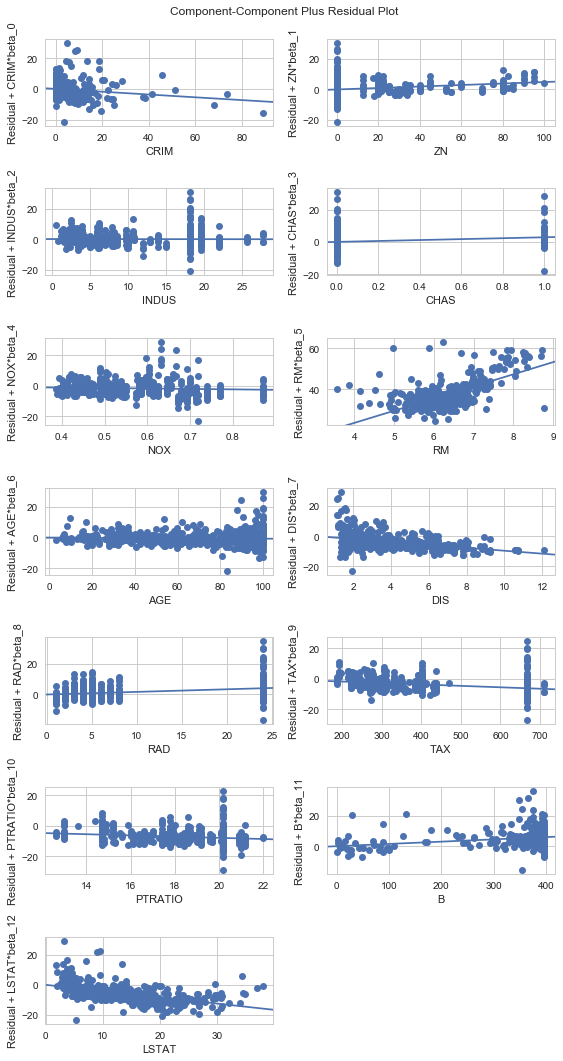

In [41]:
fig = plt.figure(figsize=(8,15))
sm.graphics.plot_ccpr_grid(result_boston, fig=fig)
plt.show()